# Import library

In [2]:
%matplotlib inline
%config InLineBackend.figure_format="retina"
import pandas as pd
import numpy as np
import seaborn as sb
import matplotlib.pyplot as plt 

# Read data

In [3]:
df = pd.read_csv("C:\\Users\\505DY\\Desktop\\Machine Learning\\Self Note\\CSV_file\\dialysis_data.csv")

# Divide data into "X" and "Y"

In [4]:
X = df.drop("Infect",axis=1)
X = X.drop("qSystolicTrend",axis=1)
Y = df[["Infect"]] 
X.columns[0]

'qHctSD'

# Function findOutliers()

In [12]:
def findOutliers(data_frame):
    for col in data_frame.columns:
        
        if "SD" not in col:
            q3 = data_frame[col].quantile(.75)
            q1 = data_frame[col].quantile(.25)
        
            iqr = q3-q1
        
            upper = q3+1.5*iqr
            lower = q1-1.5*iqr
        
            plt.axvline(x=q1, c="b", linestyle="--", linewidth=1)
            plt.axvline(x=q3, c="g", linestyle="--", linewidth=1)
            plt.axvline(x=lower, c="r", linestyle="--")
            plt.axvline(x=upper, c="r", linestyle="--")
            sb.boxplot(data_frame[col],width=0.4, palette="Set2")
            plt.show()

c:\python38\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


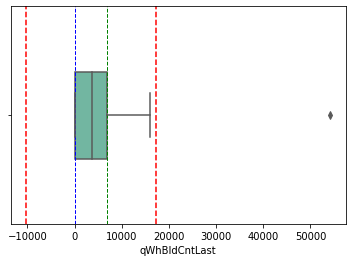

c:\python38\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


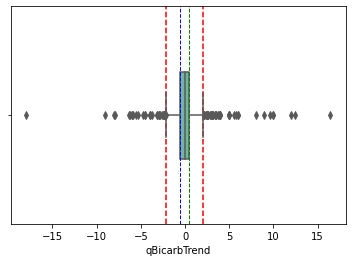

c:\python38\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


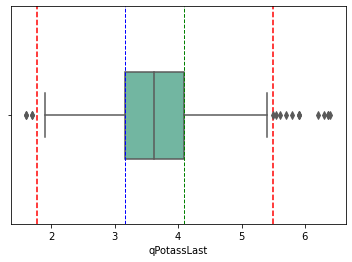

c:\python38\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


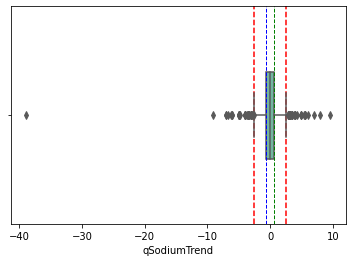

c:\python38\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


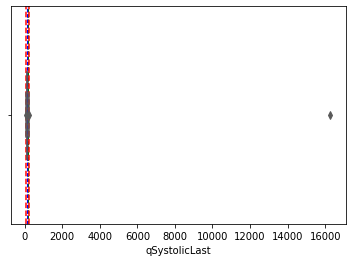

c:\python38\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


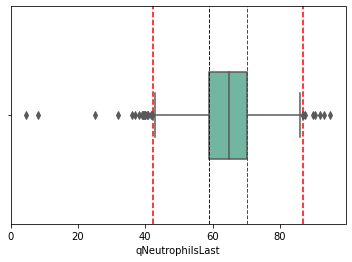

c:\python38\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


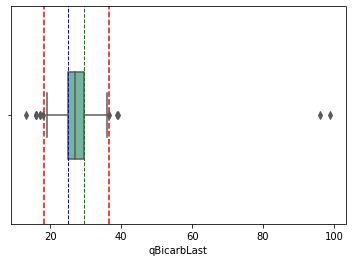

c:\python38\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


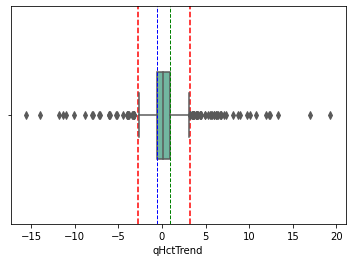

c:\python38\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


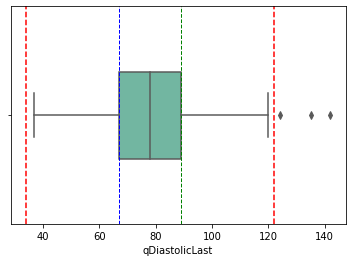

c:\python38\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


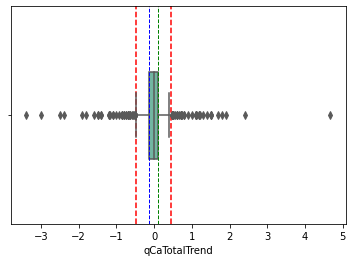

c:\python38\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


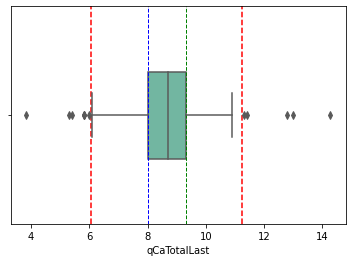

c:\python38\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


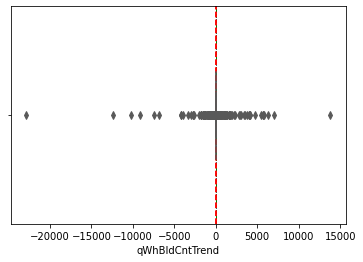

c:\python38\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


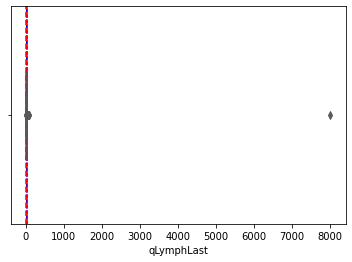

c:\python38\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


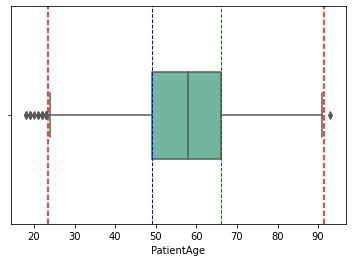

c:\python38\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


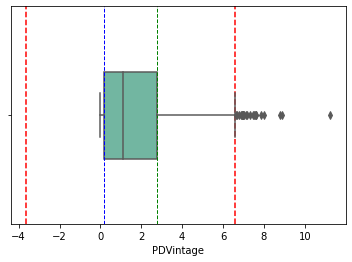

In [13]:
findOutliers(X)

# Checking all column

In [4]:
df.columns

Index(['Infect', 'qHctSD', 'qPotassSD', 'qAlbuminSD', 'qHgbSD', 'qCaTotalSD',
       'qPhosphSD', 'qDiastolicSD', 'qSodiumSD', 'qWhBldCntLast', 'qBicarbSD',
       'qBicarbTrend', 'qPotassLast', 'qSodiumTrend', 'qSystolicTrend',
       'qSystolicLast', 'qNeutrophilsLast', 'qPulseSD', 'qBicarbLast',
       'qHctTrend', 'qDiastolicLast', 'qCaTotalTrend', 'qCaTotalLast',
       'qWhBldCntTrend', 'qGlucoseSD', 'qSystolicSD', 'qLymphSD',
       'qWeightVitalSD', 'qLymphLast', 'PatientAge', 'PDVintage'],
      dtype='object')

# Divide data for training and testing 

In [5]:
from sklearn.model_selection import train_test_split
xtrain, xtest, ytrain, ytest = train_test_split(X,Y, test_size=.25, random_state=0, stratify=Y)

# Function getScore_StratifiedKFold() 

In [6]:
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import StandardScaler as SC
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score, cross_val_predict
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

def getScore_StratifiedKFold(model,nsplits=5):
    
    train_acc= []
    train_pre= []
    train_rec= []
    train_f1 = []   
    
    skfolds = StratifiedKFold(
        n_splits=nsplits, 
        random_state=None)
    
    for train_index, test_index in skfolds.split(xtrain, ytrain):
        xtrain_fold = xtrain.iloc[train_index]
        xtest_fold = xtrain.iloc[test_index]
        ytrain_fold = ytrain.iloc[train_index]
        ytest_fold = ytrain.iloc[test_index]
        
        # Scaling the feature
        sc=SC()
        xtrain_new = sc.fit_transform(xtrain_fold)
        xtest_new = sc.transform(xtest_fold)
        
        #Dealing with Imbalanced value
        smote = SMOTE(sampling_strategy='minority')
        xtrain_sm,ytrain_sm = smote.fit_resample(xtrain_new, ytrain_fold)
        
        model.fit(xtrain_sm, np.ravel(ytrain_sm))
        ypred_fold = model.predict(xtest_new)
        
        train_acc.append(accuracy_score(ytest_fold,ypred_fold))
        train_pre.append(precision_score(ytest_fold,ypred_fold))
        train_rec.append(recall_score(ytest_fold,ypred_fold))
        train_f1.append(f1_score(ytest_fold,ypred_fold))
    
    xtest_sc = sc.transform(xtest)
    ytest_pred = model.predict(xtest_sc)   
        
    print("--------------Training Score----------------")
    print(f"Accuracy score: {np.mean(train_acc)*100}%")
    print(f"Precision score: {np.mean(train_pre)*100}%")
    print(f"Recall score: {np.mean(train_rec)*100}%")
    print(f"F1 score: {np.mean(train_f1)*100}%")
    
    print("--------------Testing Score----------------")
    print(f"Accuracy score: {accuracy_score(ytest,ytest_pred)*100}%")
    print(f"Precision score: {precision_score(ytest,ytest_pred)*100}%")
    print(f"Recall score: {recall_score(ytest,ytest_pred)*100}%")
    print(f"F1 score: {f1_score(ytest,ytest_pred)*100}%")

# Function getScore_StratifiedKFold_noSMOTE() 

In [7]:
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import StandardScaler as SC
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score, cross_val_predict
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

def getScore_StratifiedKFold_noSMOTE(model,nsplits=5):
    
    train_acc= []
    train_pre= []
    train_rec= []
    train_f1 = []   
    
    skfolds = StratifiedKFold(
        n_splits=nsplits, 
        random_state=None)
    
    for train_index, test_index in skfolds.split(xtrain, ytrain):
        xtrain_fold = xtrain.iloc[train_index]
        xtest_fold = xtrain.iloc[test_index]
        ytrain_fold = ytrain.iloc[train_index]
        ytest_fold = ytrain.iloc[test_index]
        
        # Scaling the feature
        sc=SC()
        xtrain_new = sc.fit_transform(xtrain_fold)
        xtest_new = sc.transform(xtest_fold)
        
        #Trianing and Predict 
        model.fit(xtrain_new, np.ravel(ytrain_fold))
        ypred_fold = model.predict(xtest_new)
        
        #Appending all value to the lists
        train_acc.append(accuracy_score(ytest_fold,ypred_fold))
        train_pre.append(precision_score(ytest_fold,ypred_fold))
        train_rec.append(recall_score(ytest_fold,ypred_fold))
        train_f1.append(f1_score(ytest_fold,ypred_fold))
        
    xtest_sc = sc.transform(xtest)
    ytest_pred = model.predict(xtest_sc) 
    
    print("--------------Training Score----------------")
    print(f"Accuracy score: {np.mean(train_acc)*100}%")
    print(f"Precision score: {np.mean(train_pre)*100}%")
    print(f"Recall score: {np.mean(train_rec)*100}%")
    print(f"F1 score: {np.mean(train_f1)*100}%")
    
    print("--------------Testing Score----------------")
    print(f"Accuracy score: {accuracy_score(ytest,ytest_pred)*100}%")
    print(f"Precision score: {precision_score(ytest,ytest_pred)*100}%")
    print(f"Recall score: {recall_score(ytest,ytest_pred)*100}%")
    print(f"F1 score: {f1_score(ytest,ytest_pred)*100}%")

# Function getBestParam()

In [8]:
from sklearn.model_selection import GridSearchCV

def getBestParam(model,param_grid=None):
    grid_search = GridSearchCV(model ,param_grid, refit = True, verbose=0,n_jobs=-1,scoring='f1',cv=10)
    grid_search.fit(xtrain,np.ravel(ytrain))
    return grid_search.best_params_

#  #------------------------------RandomForestClassifier---------------------------------------#

In [9]:
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier()
param_grid = {
    'n_estimators'      : [10,40,70],
    'max_depth'         : [1,6,10],
    'random_state'      : [0,42],
    'criterion' :['gini','entropy']
}
getBestParam(clf,param_grid)

{'criterion': 'gini', 'max_depth': 10, 'n_estimators': 70, 'random_state': 0}

In [10]:
clf=RandomForestClassifier(
    criterion        = 'gini',
    max_depth        = 10,
    n_estimators     = 70, 
    random_state     = 0,
    class_weight="balanced")

getScore_StratifiedKFold(clf)

--------------Training Score----------------
Accuracy score: 75.31089294062646%
Precision score: 46.252344416027285%
Recall score: 37.826086956521735%
F1 score: 40.920075815433805%
--------------Testing Score----------------
Accuracy score: 74.19354838709677%
Precision score: 44.0%
Recall score: 29.72972972972973%
F1 score: 35.48387096774193%


In [11]:
getScore_StratifiedKFold(clf,nsplits=10)

--------------Training Score----------------
Accuracy score: 77.48843663274747%
Precision score: 56.55627705627706%
Recall score: 36.81818181818181%
F1 score: 42.668184663035916%
--------------Testing Score----------------
Accuracy score: 74.83870967741936%
Precision score: 46.666666666666664%
Recall score: 37.83783783783784%
F1 score: 41.7910447761194%


In [12]:
getScore_StratifiedKFold_noSMOTE(clf)

--------------Training Score----------------
Accuracy score: 77.47779336138383%
Precision score: 49.72222222222222%
Recall score: 17.94466403162055%
F1 score: 26.246543778801843%
--------------Testing Score----------------
Accuracy score: 76.77419354838709%
Precision score: 55.55555555555556%
Recall score: 13.513513513513514%
F1 score: 21.73913043478261%


In [13]:
getScore_StratifiedKFold_noSMOTE(clf,nsplits=10)

--------------Training Score----------------
Accuracy score: 78.1313598519889%
Precision score: 54.666666666666664%
Recall score: 21.515151515151516%
F1 score: 30.087923428480707%
--------------Testing Score----------------
Accuracy score: 75.48387096774194%
Precision score: 44.44444444444444%
Recall score: 10.81081081081081%
F1 score: 17.391304347826086%


c:\python38\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [15]:
clf.feature_importances_

array([0.05506048, 0.05284252, 0.03470204, 0.03020613, 0.02324387,
       0.03534685, 0.02071448, 0.0384153 , 0.03047892, 0.03341202,
       0.05699105, 0.03664149, 0.04293918, 0.02725549, 0.03610446,
       0.01977909, 0.03065554, 0.02238818, 0.02806407, 0.02401577,
       0.02489908, 0.02373958, 0.01931258, 0.03846749, 0.03198129,
       0.05653227, 0.03183222, 0.03440958, 0.05956896])

In [17]:
fs=pd.Series(clf.feature_importances_, index=X.columns).sort_values(ascending=False)
fs

PDVintage           0.059569
qBicarbTrend        0.056991
qWeightVitalSD      0.056532
qHctSD              0.055060
qPotassSD           0.052843
qSodiumTrend        0.042939
qSystolicSD         0.038467
qSodiumSD           0.038415
qPotassLast         0.036641
qNeutrophilsLast    0.036104
qPhosphSD           0.035347
qAlbuminSD          0.034702
PatientAge          0.034410
qBicarbSD           0.033412
qLymphSD            0.031981
qLymphLast          0.031832
qBicarbLast         0.030656
qWhBldCntLast       0.030479
qHgbSD              0.030206
qDiastolicLast      0.028064
qSystolicLast       0.027255
qCaTotalLast        0.024899
qCaTotalTrend       0.024016
qWhBldCntTrend      0.023740
qCaTotalSD          0.023244
qHctTrend           0.022388
qDiastolicSD        0.020714
qPulseSD            0.019779
qGlucoseSD          0.019313
dtype: float64

In [20]:
fs.index

Index(['PDVintage', 'qBicarbTrend', 'qWeightVitalSD', 'qHctSD', 'qPotassSD',
       'qSodiumTrend', 'qSystolicSD', 'qSodiumSD', 'qPotassLast',
       'qNeutrophilsLast', 'qPhosphSD', 'qAlbuminSD', 'PatientAge',
       'qBicarbSD', 'qLymphSD', 'qLymphLast', 'qBicarbLast', 'qWhBldCntLast',
       'qHgbSD', 'qDiastolicLast', 'qSystolicLast', 'qCaTotalLast',
       'qCaTotalTrend', 'qWhBldCntTrend', 'qCaTotalSD', 'qHctTrend',
       'qDiastolicSD', 'qPulseSD', 'qGlucoseSD'],
      dtype='object')

In [22]:
fs[fs>0.1].index

Index([], dtype='object')